# Handwritten Digit Recognition Model Execution

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
import pygame
import cv2

pygame 2.6.0 (SDL 2.28.4, Python 3.12.4)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
model = keras.models.load_model("handwritten_digit_recognition.keras")

In [14]:
pygame.init()

# Set the canvas size to 28x28 pixels
canvas_size = 500
screen = pygame.display.set_mode((canvas_size, canvas_size))

# Set the title of the window
pygame.display.set_caption("Drawing Canvas")

# Set the background color to black
screen.fill((0, 0, 0))

# Set drawing color to white
draw_color = (255, 255, 255)
brush_size = 10

# Function to save the drawing as an image
def save_drawing(surface, filename):
    pygame.image.save(surface, filename)

# Main loop
running = True
while running:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False

        # Drawing with mouse
        if pygame.mouse.get_pressed()[0]:
            mouse_pos = pygame.mouse.get_pos()
            pygame.draw.circle(screen, draw_color, mouse_pos, brush_size)

        # Save the image when the user presses the 'S' key
        if event.type == pygame.KEYDOWN:
            if event.key == pygame.K_s:
                save_drawing(screen, "drawing.png")
                print("Drawing saved as drawing.png")
    
    # Update the display
    pygame.display.flip()

# Quit pygame
pygame.quit()

Drawing saved as drawing.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
8


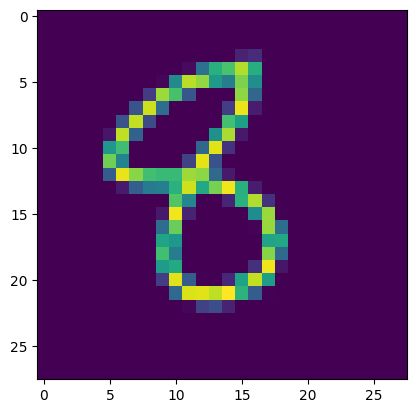

In [15]:
# Execution
img1 = cv2.imread('drawing.png')
IMG_SIZE = 28
plt.imshow(img1)
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized1 = cv2.resize(gray1, (28,28), interpolation = cv2.INTER_AREA)
newing1 = tf.keras.utils.normalize(resized1, axis=1) # 0 to 1 Scaling
newing1 = np.array(newing1).reshape(-1, IMG_SIZE, IMG_SIZE, 1) # kernel operation of convolution layer,
plt.imshow(resized1)
predictions1 = model.predict(newing1)
print(np.argmax(predictions1))